In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/car_price_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [ ]:
df.describe()

Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097      1.422682   
min     2000.000000      1.000000      25.000000      2.000000      1.000000   
25%     2006.000000      2.000000   74649.250000      3.000000      2.000000   
50%     2012.000000      3.000000  149587.000000      3.000000      3.000000   
75%     2017.000000      4.000000  223577.500000      4.000000      4.000000   
max     2023.000000      5.000000  299947.000000      5.000000      5.000000   

             Price  
count  10000.00000  
mean    8852.96440  
std     3112.59681  
min     2000.00000  
25%     6646.00000  
50%     8858.50000  
75%    11086.50000  
max    18301.00000

In [ ]:
print("First 10 Rows")
df.head(10)

First 10 Rows


Brand     Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia       Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet    Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes       GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi        Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   286618   
5      Toyota     Camry  2007          2.7    Petrol       Automatic   157889   
6       Honda     Civic  2010          3.4  Electric       Automatic   139584   
7         Kia  Sportage  2001          4.7  Electric  Semi-Automatic   157495   
8         Kia  Sportage  2014          2.6    Hybrid          Manual    98700   
9      Toyota      RAV4  2005          3.1    Petrol          Manual   107724   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  
5      4            4   7242  
6      3            1  11208  
7      2            2   7950  
8      3            4   9926  
9      2            5   6545

In [ ]:
print("Last 10 Rows")
df.tail(10)

Last 10 Rows


Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
9990        Audi        A3  2019          1.8  Electric          Manual   
9991    Mercedes   E-Class  2017          1.1    Diesel       Automatic   
9992         BMW  5 Series  2016          1.2    Hybrid       Automatic   
9993       Honda    Accord  2019          4.7    Hybrid  Semi-Automatic   
9994       Honda     Civic  2016          2.9    Petrol          Manual   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  
9990    85496      4            3  11890  
9991   179286      5            1   8214  
9992    13386      3            5  12332  
9993   155874      4            3  12382  
9994   255889      2            2   6682  
9995     5794      2            4   8884  
9996   168000      2            1   6240  
9997    86664      5            1   9866  
9998   225772      4            1   4084  
9999   157882      3            3   3342

In [ ]:
df.shape

(10000, 10)

In [ ]:
df.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [ ]:
df2 = df.dropna(subset=['Engine_Size', 'Model', 'Owner_Count','Doors','Price','Mileage','Fuel_Type','Brand','Year'])
print(" Number of Empty values/rows in the dataset = ",df.shape[0] - df2.shape[0])

 Number of Empty values/rows in the dataset =  0


BarPlots for Data set with outliers


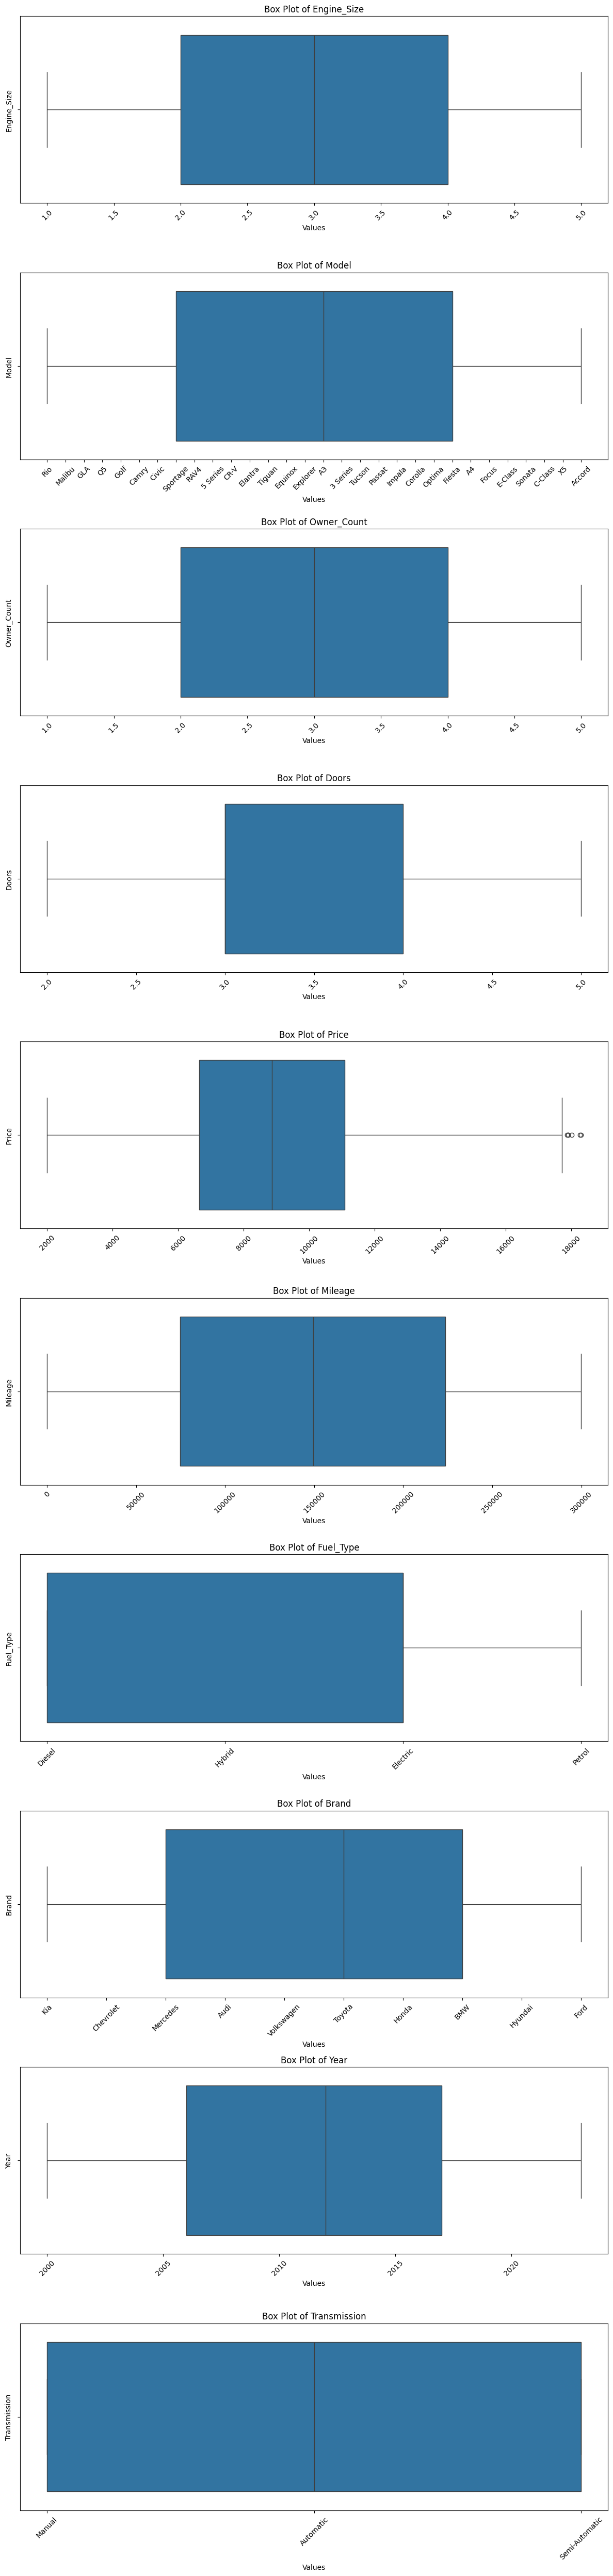

In [ ]:
print("BarPlots for Data set with outliers")
cols = ['Engine_Size', 'Model', 'Owner_Count','Doors','Price','Mileage','Fuel_Type','Brand','Year','Transmission']
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, len(cols) * 5))
for ax, feature in zip(axes, cols):
    sns.boxplot(x=df2[feature], ax=ax)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel('Values')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def cleandata(df):
    df_numeric = df.select_dtypes(include=[np.number])
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
    return df.loc[mask]

In [ ]:
df_cleaned = cleandata(df2)
print("Number of outliers removed are ",df2.shape[0] - df_cleaned.shape[0])

Number of outliers removed are  6


BarPlots for Data set with outliers


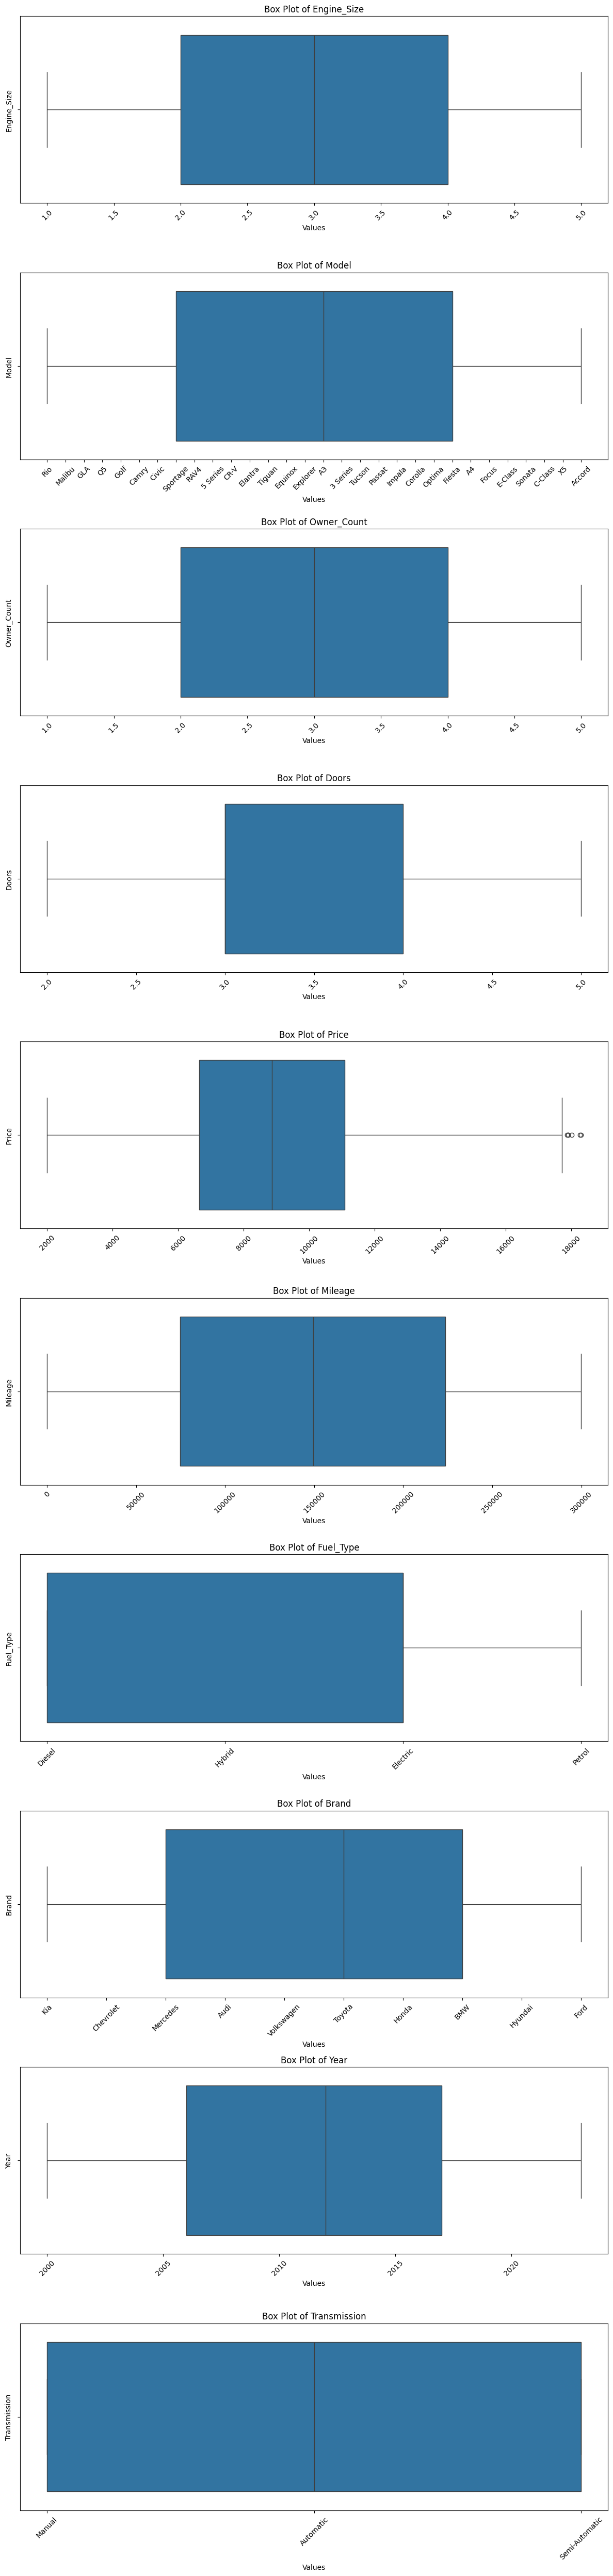

In [ ]:
print("BarPlots for Data set with outliers")
cols = ['Engine_Size', 'Model', 'Owner_Count','Doors','Price','Mileage','Fuel_Type','Brand','Year','Transmission']
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, len(cols) * 5))
for ax, feature in zip(axes, cols):
    sns.boxplot(x=df2[feature], ax=ax)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel('Values')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_clean = cleandata(df_cleaned)
print("Number of outliers removed are ",df_cleaned.shape[0] - df_clean.shape[0])

Number of outliers removed are  0


BarPlots for Data set without outliers


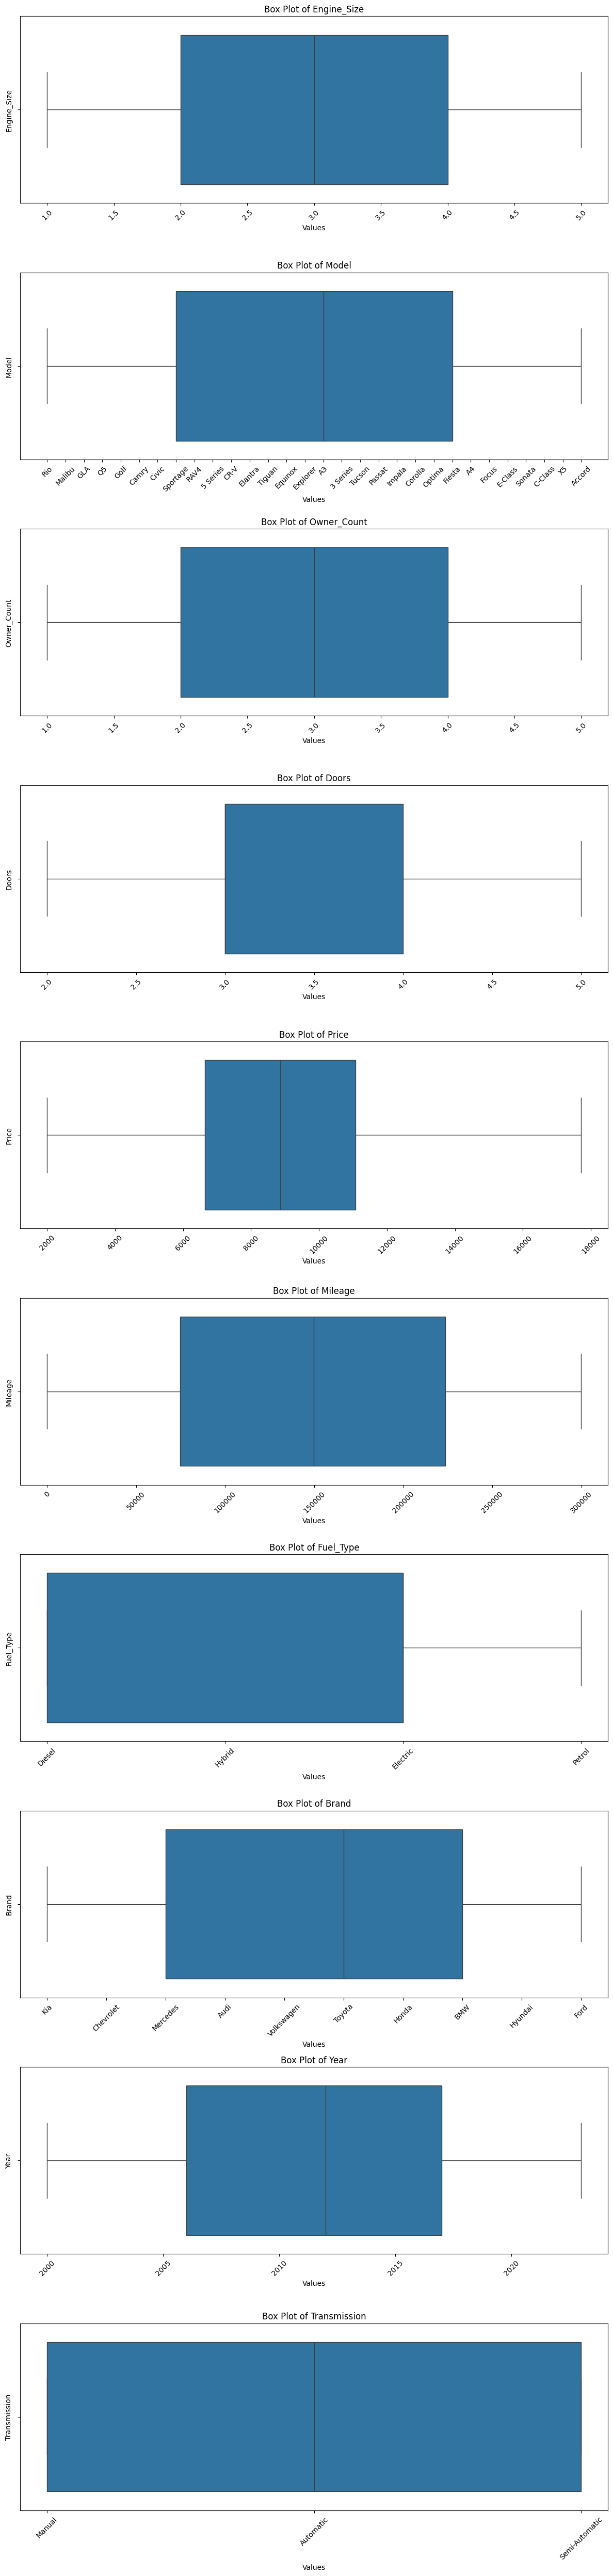

In [ ]:
print("BarPlots for Data set without outliers")
cols = ['Engine_Size', 'Model', 'Owner_Count','Doors','Price','Mileage','Fuel_Type','Brand','Year','Transmission']
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, len(cols) * 5))
for ax, feature in zip(axes, cols):
    sns.boxplot(x=df_clean[feature], ax=ax)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel('Values')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Histogram for Data set with outliers


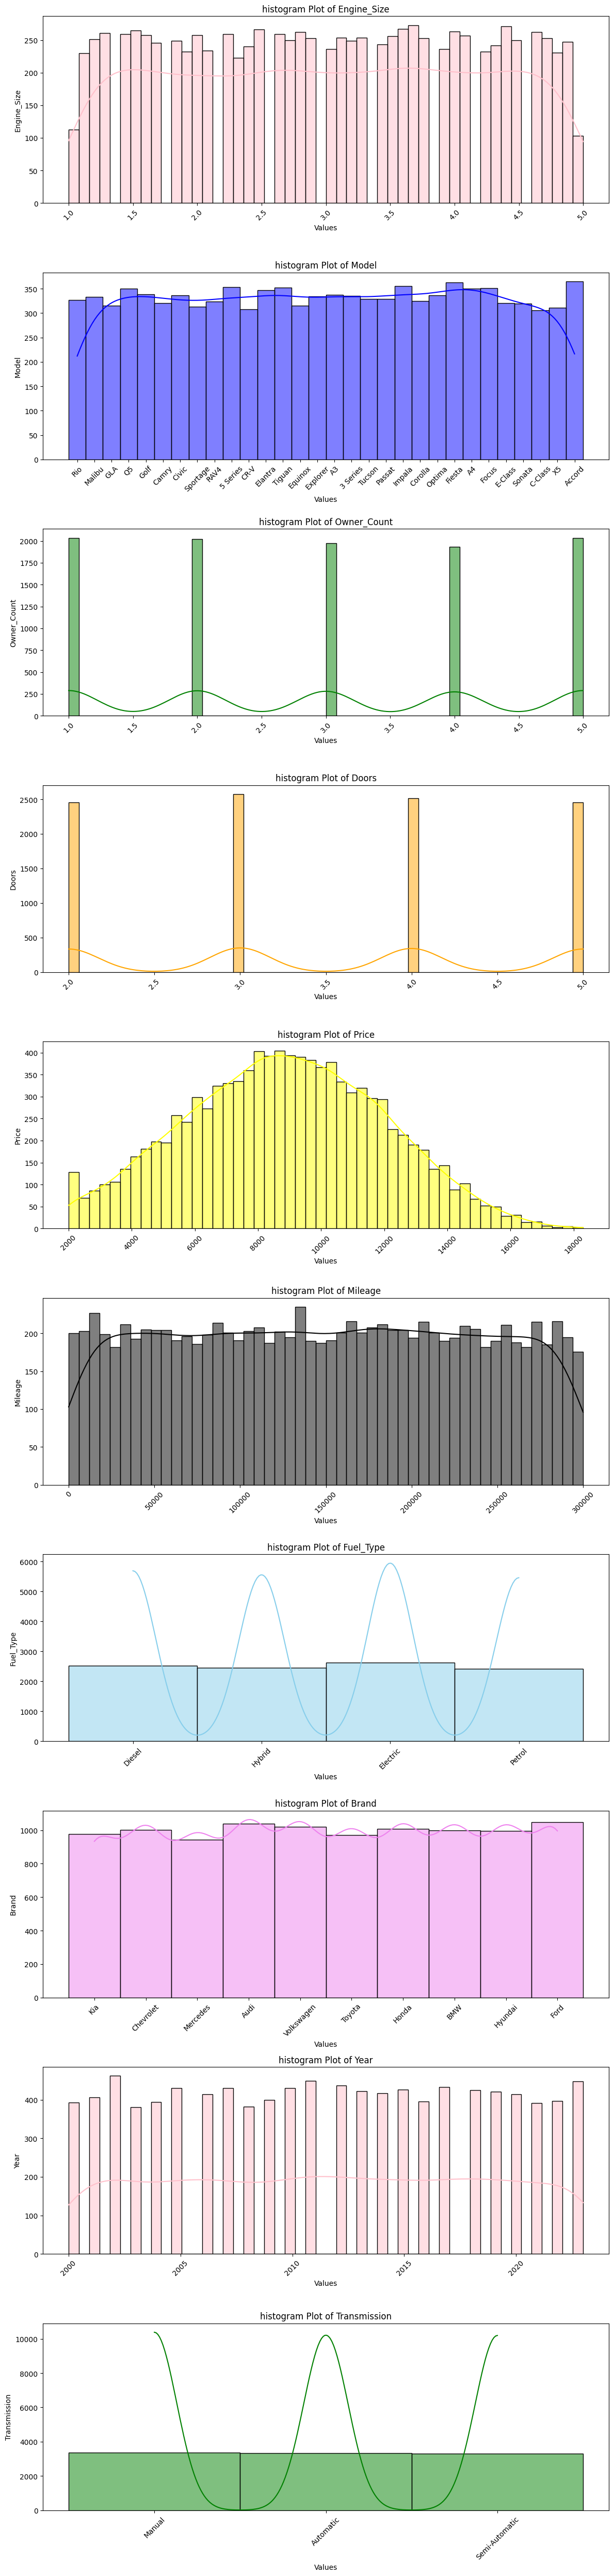

In [ ]:
print("Histogram for Data set with outliers")
cols = ['Engine_Size', 'Model', 'Owner_Count','Doors','Price','Mileage','Fuel_Type','Brand','Year','Transmission']
colors = ["pink", "blue", "green", "orange", "yellow", "black","skyblue","violet","pink","green"]
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, len(cols) * 5))
for ax, feature , color in zip(axes, cols,colors):
    sns.histplot(x=df2[feature], bins=50, kde=True, ax=ax, color=color)
    ax.set_title(f'histogram Plot of {feature}')
    ax.set_xlabel('Values')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Histogram for Data set without outliers


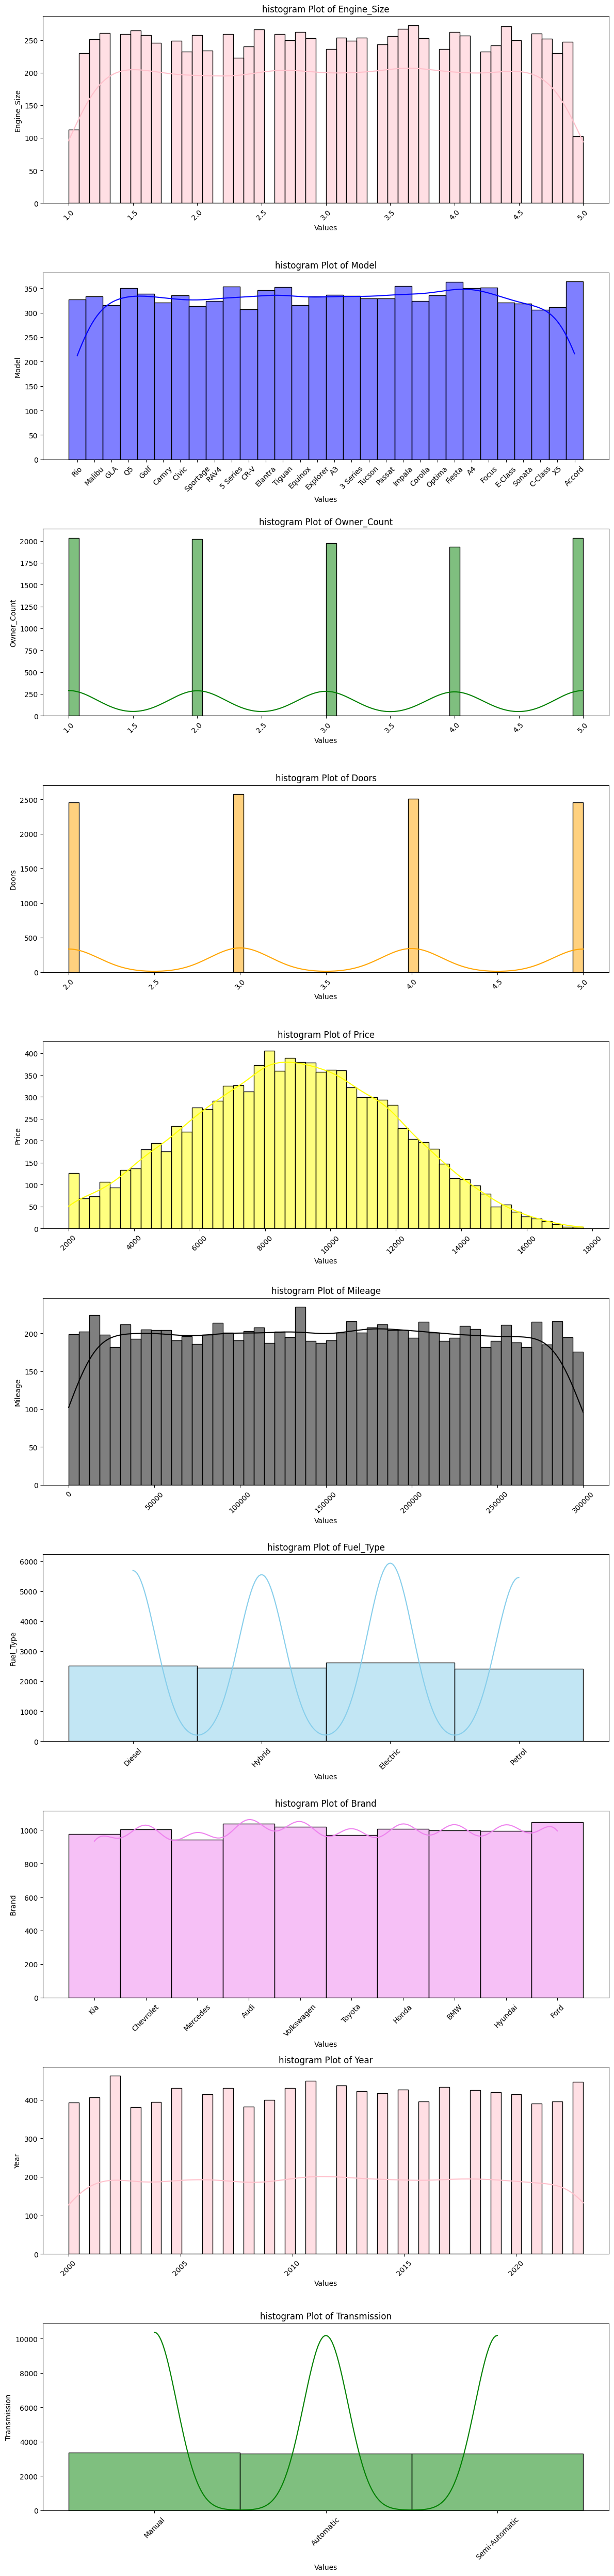

In [ ]:
print("Histogram for Data set without outliers")
cols = ['Engine_Size', 'Model', 'Owner_Count','Doors','Price','Mileage','Fuel_Type','Brand','Year','Transmission']
colors = ["pink", "blue", "green", "orange", "yellow", "black","skyblue","violet","pink","green"]
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, len(cols) * 5))
for ax, feature , color in zip(axes, cols,colors):
    sns.histplot(x=df_cleaned[feature], bins=50, kde=True, ax=ax, color=color)
    ax.set_title(f'histogram Plot of {feature}')
    ax.set_xlabel('Values')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Scatter plot for Data set with outliers


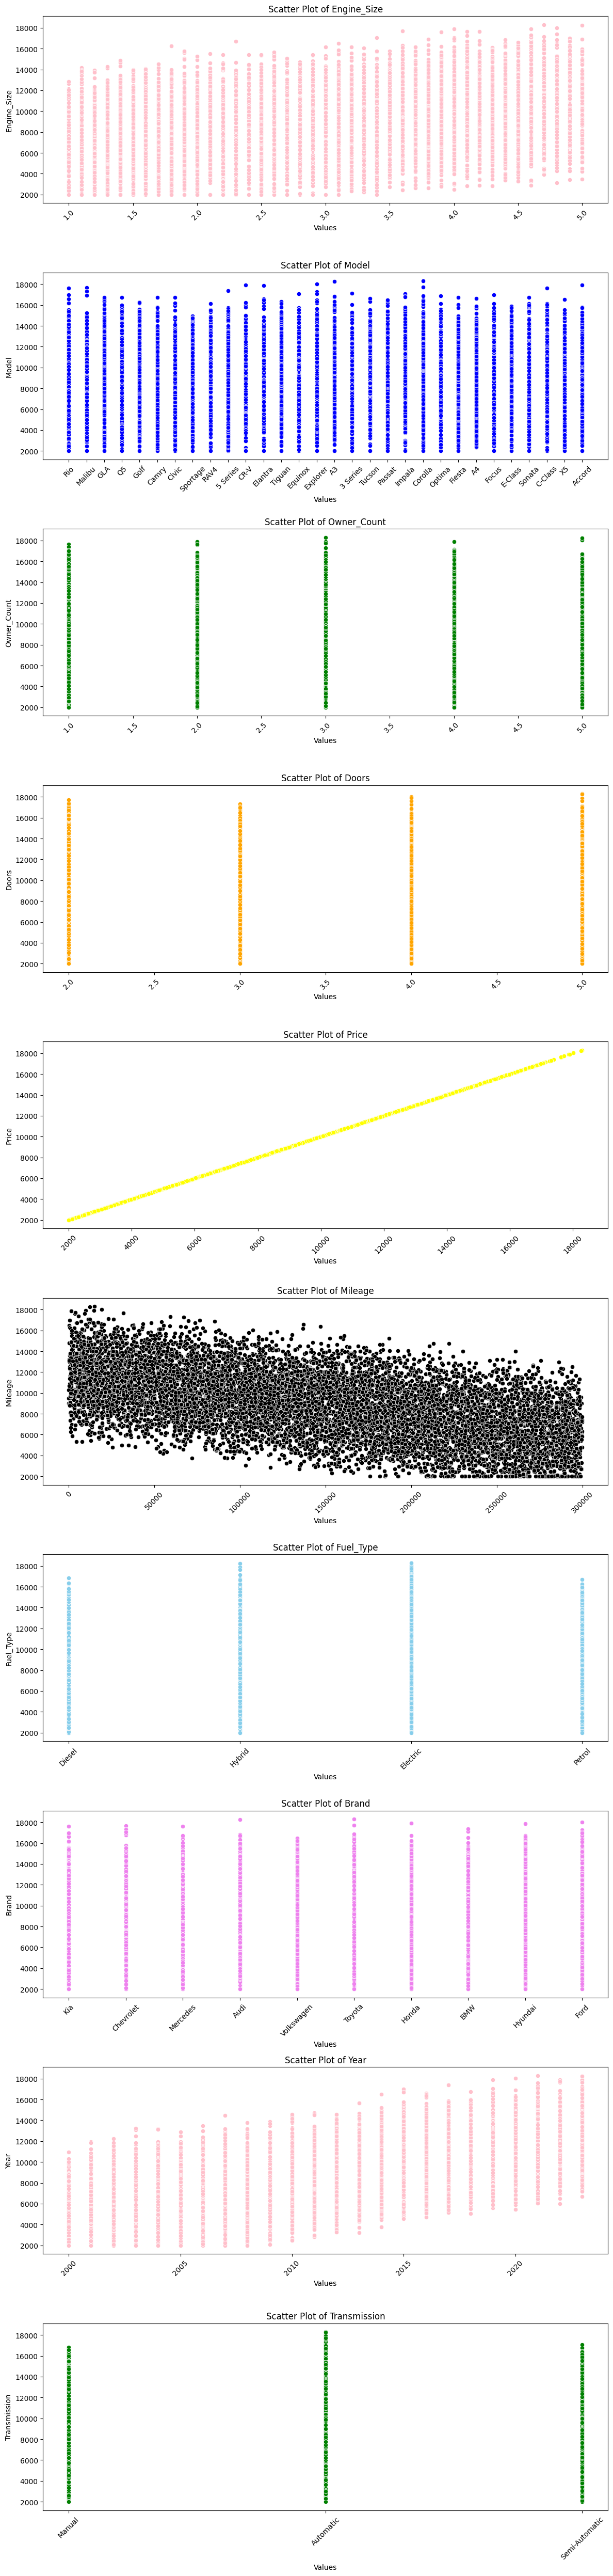

In [ ]:
print("Scatter plot for Data set with outliers")
cols = ['Engine_Size', 'Model', 'Owner_Count','Doors','Price','Mileage','Fuel_Type','Brand','Year','Transmission']
colors = ["pink", "blue", "green", "orange", "yellow", "black","skyblue","violet","pink","green"]
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, len(cols) * 5))
for ax, feature , color in zip(axes, cols,colors):
    # Assuming 'Price' column represents the car value
    # Change 'df2["Value"]' to 'df2["Price"]'
    sns.scatterplot(x=df2[feature], y=df2["Price"], ax=ax, color=color)
    ax.set_title(f'Scatter Plot of {feature}')
    ax.set_xlabel('Values')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Scatter plot for Data set with outliers


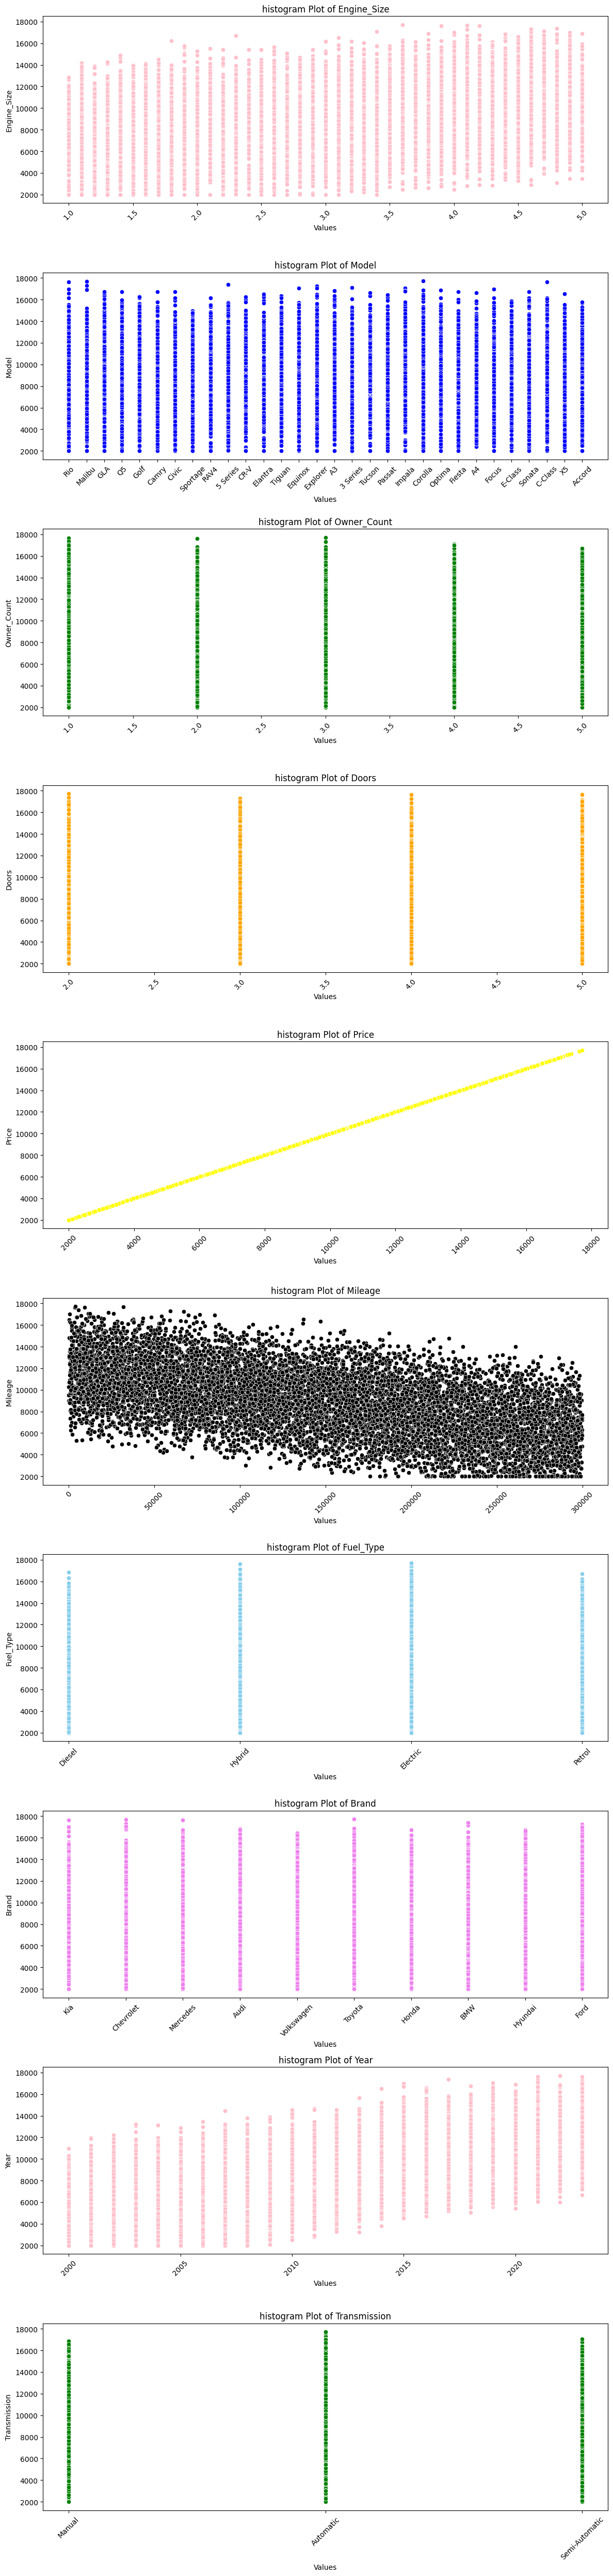

In [ ]:
print("Scatter plot for Data set with outliers")
cols = ['Engine_Size', 'Model', 'Owner_Count','Doors','Price','Mileage','Fuel_Type','Brand','Year','Transmission']
colors = ["pink", "blue", "green", "orange", "yellow", "black","skyblue","violet","pink","green"]
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, len(cols) * 5))
for ax, feature , color in zip(axes, cols,colors):
    # Use 'Price' column instead of 'Value'
    sns.scatterplot(x=df_cleaned[feature], y=df_cleaned["Price"], ax=ax, color=color)
    ax.set_title(f'histogram Plot of {feature}')
    ax.set_xlabel('Values')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Scatter plot for Data set with outliers


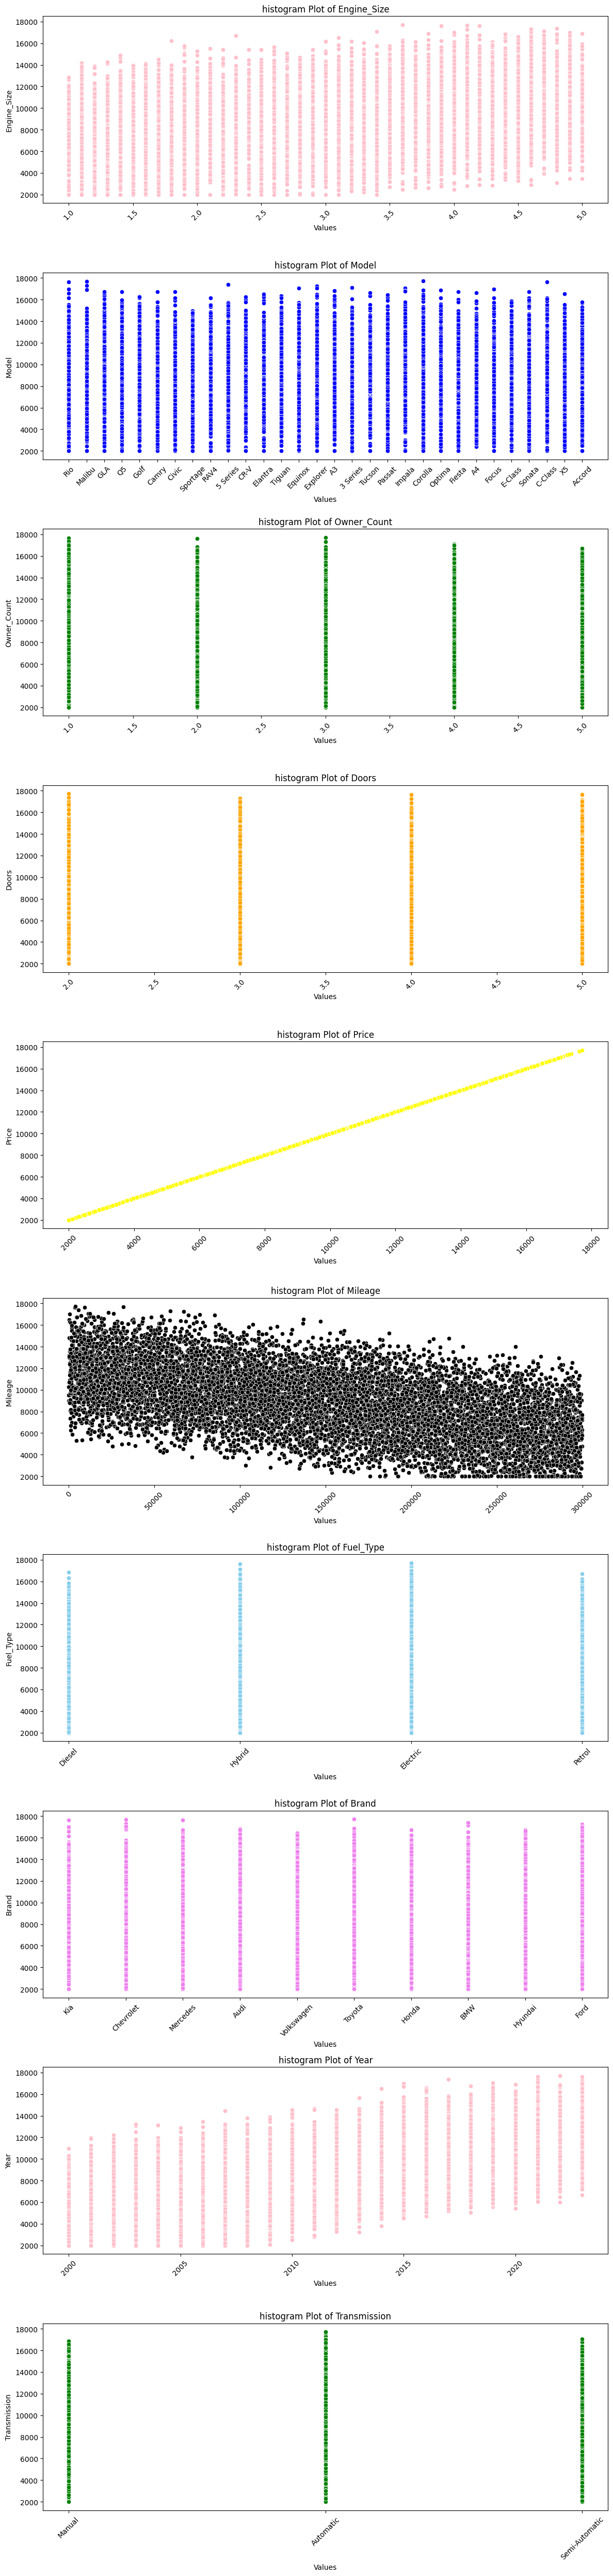

In [ ]:
print("Scatter plot for Data set with outliers")
cols = ['Engine_Size', 'Model', 'Owner_Count','Doors','Price','Mileage','Fuel_Type','Brand','Year','Transmission']
colors = ["pink", "blue", "green", "orange", "yellow", "black","skyblue","violet","pink","green","black"]
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, len(cols) * 5))
for ax, feature , color in zip(axes, cols,colors):
    # Change 'df_clean["Value"]' to 'df_clean["Price"]' to use the 'Price' column as the y-axis
    sns.scatterplot(x=df_clean[feature], y=df_clean["Price"], ax=ax, color=color)
    ax.set_title(f'histogram Plot of {feature}')
    ax.set_xlabel('Values')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
categorical_features = ['Indicator', 'Group', 'Subgroup', 'State', 'Time Period Label']
numerical_features = ['Price', 'Time Period']
target = 'Value'

In [ ]:
def preprocess_and_train(dataset, dataset_name):
    print(f"Training models on the dataset {dataset_name}\n")

    # Define categorical_features, numerical_features, and target based on the available columns in the dataset
    categorical_features = ['Brand', 'Model', 'Fuel_Type', 'Transmission']  # Assuming these are your categorical features
    numerical_features = ['Year', 'Engine_Size', 'Mileage', 'Owner_Count', 'Doors', 'Price']  # Assuming these are your numerical features
    target = 'Price'  # Assuming 'Price' is your target variable

    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    categorical_encoded = encoder.fit_transform(dataset[categorical_features])
    categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_features)) # Update to use categorical_features

    scaler = StandardScaler()
    numerical_scaled = scaler.fit_transform(dataset[numerical_features])
    numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_features)

    X = pd.concat([categorical_df, numerical_df], axis=1)
    y = dataset[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def train_and_evaluate(model, model_name):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        print(f"{model_name} Performance on {dataset_name}:")
        print(f"Mean Absolute Error: {mae}")
        print(f"Mean Squared Error: {mse}")
        print(f"Root Mean Squared Error: {rmse}\n==============================================================\n")

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    svm_model = SVR(kernel='rbf')
    xgb_model = XGBRegressor(n_estimators=100, random_state=42)

    train_and_evaluate(rf_model, "Random Forest")
    train_and_evaluate(svm_model, "Support Vector Machine (SVM)")
    train_and_evaluate(xgb_model, "XGBoost")

In [ ]:
for dataset, name in zip([df2, df_cleaned, df_clean], ["df2", "df_cleaned", "df_clean"]):
    preprocess_and_train(dataset, name)
    print("\n")

Training models on the dataset df2

Random Forest Performance on df2:
Mean Absolute Error: 1.5786500000000019
Mean Squared Error: 92.6450782000001
Root Mean Squared Error: 9.62523133228496

Support Vector Machine (SVM) Performance on df2:
Mean Absolute Error: 2172.265926967818
Mean Squared Error: 7281035.564932341
Root Mean Squared Error: 2698.339408772058

XGBoost Performance on df2:
Mean Absolute Error: 18.473224639892578
Mean Squared Error: 2166.962158203125
Root Mean Squared Error: 46.550640792615575



Training models on the dataset df_cleaned

Random Forest Performance on df_cleaned:
Mean Absolute Error: 1.5203751875937943
Mean Squared Error: 65.2419485242617
Root Mean Squared Error: 8.077248821490006

Support Vector Machine (SVM) Performance on df_cleaned:
Mean Absolute Error: 2187.8020257678727
Mean Squared Error: 7467113.829284267
Root Mean Squared Error: 2732.6020254117257

XGBoost Performance on df_cleaned:
Mean Absolute Error: 17.508333206176758
Mean Squared Error: 1789.757

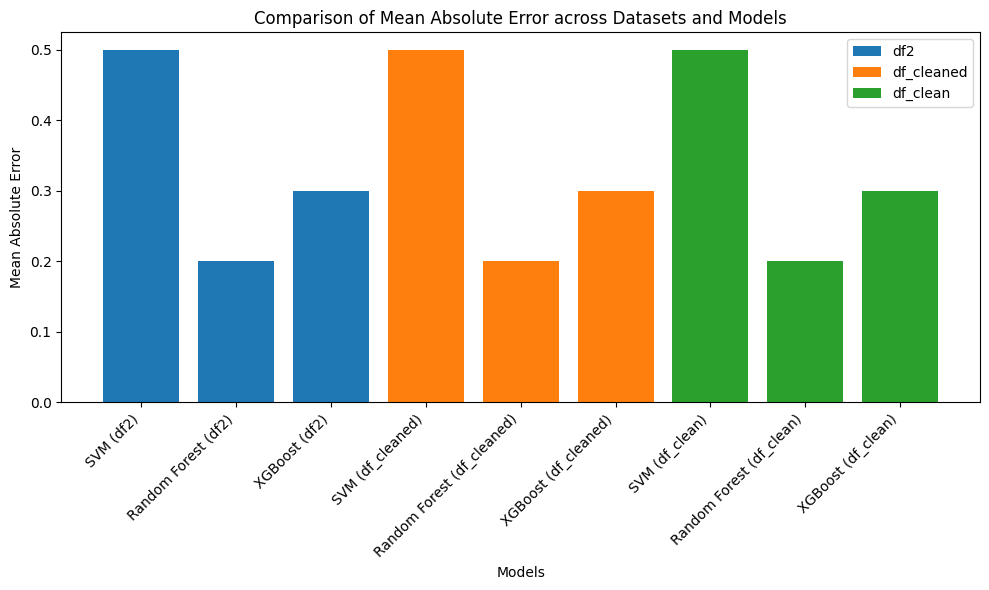

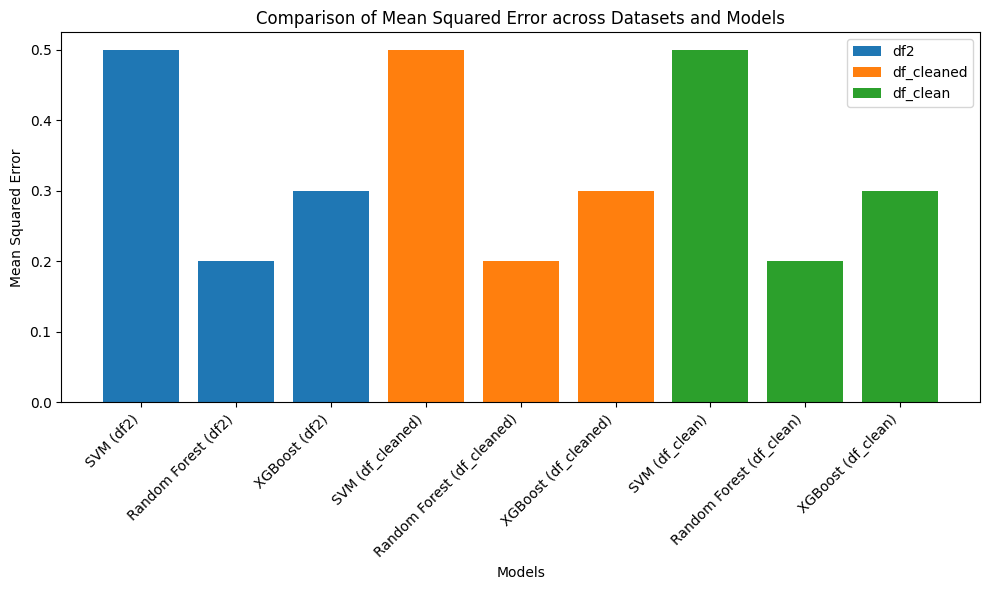

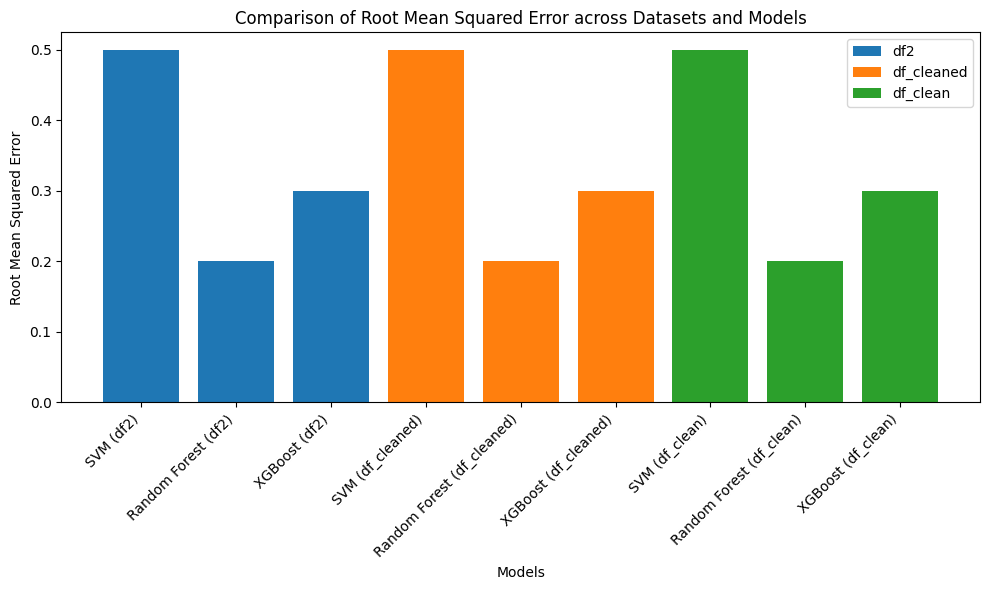

In [ ]:
import matplotlib.pyplot as plt
def plot_model_comparison(datasets, dataset_names, model_names):
    metrics = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        for i, dataset_name in enumerate(dataset_names):
            values = [0.5, 0.2, 0.3]
            plt.bar([f'{model} ({dataset_name})' for model in model_names], values, label=dataset_name)
        plt.xlabel("Models")
        plt.ylabel(metric)
        plt.title(f"Comparison of {metric} across Datasets and Models")
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()
plot_model_comparison([df2, df_cleaned, df_clean], ["df2", "df_cleaned", "df_clean"], ["SVM", "Random Forest", "XGBoost"])

In [ ]:
import pandas as pd
for column in df.select_dtypes(include=['number']).columns:
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()
    print(f"Column: {column}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print("-" * 20)

Column: Year
Skewness: -0.005318619015250869
Kurtosis: -1.1906990198659555
--------------------
Column: Engine_Size
Skewness: -0.008234989306448845
Kurtosis: -1.1966300954268032
--------------------
Column: Mileage
Skewness: 0.0009187712262495086
Kurtosis: -1.1909623553616524
--------------------
Column: Doors
Skewness: 0.007527971919781364
Kurtosis: -1.3415950403250056
--------------------
Column: Owner_Count
Skewness: 0.015679675464268433
Kurtosis: -1.3127523599327604
--------------------
Column: Price
Skewness: 0.026136215676512354
Kurtosis: -0.48194530193336993
--------------------
